Lowest Depth: 245.0
Highest Depth: 4625.0


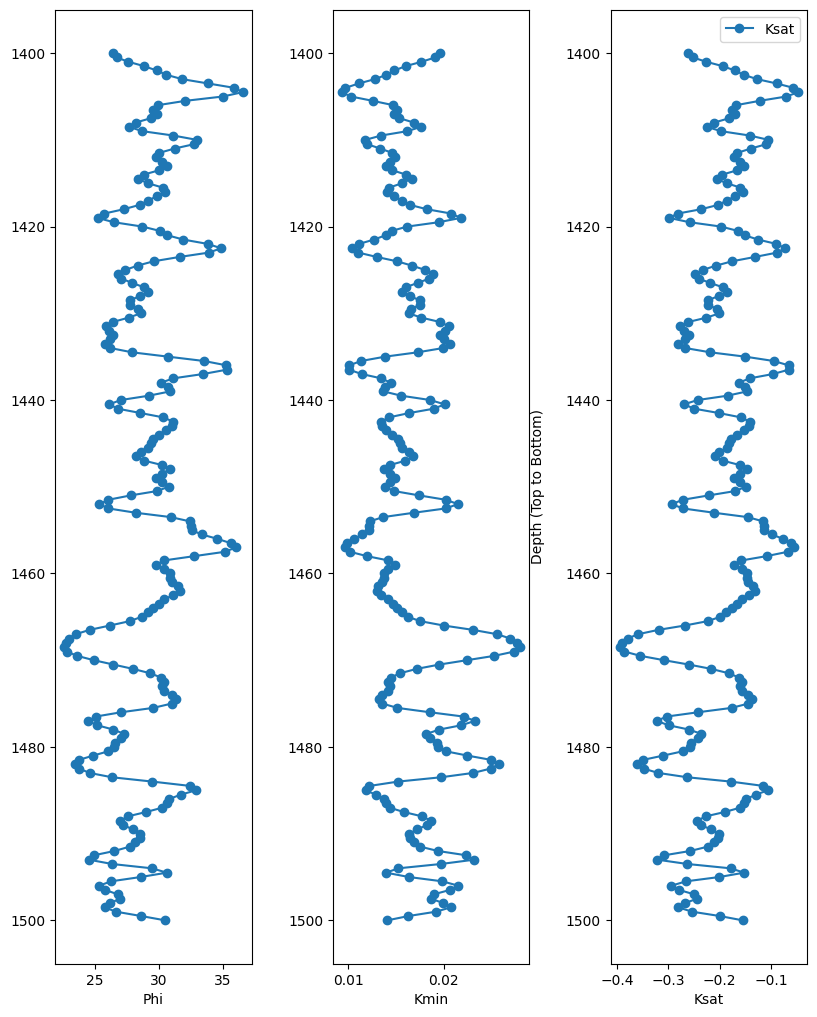

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Well Logs/Big-Log.csv')

# Find the lowest and highest values of Depth
lowest_depth = df['Depth'].min()
highest_depth = df['Depth'].max()

print(f"Lowest Depth: {lowest_depth}")
print(f"Highest Depth: {highest_depth}")

# Define the depth range (low and high)
depth_low = 1400   # Set your desired low depth value
depth_high = 1500  # Set your desired high depth value

# Filter the DataFrame based on the depth range
df = df[(df['Depth'] >= depth_low) & (df['Depth'] <= depth_high)]

# Extract columns
req_cols = ['Depth', 'CNPOR', 'DPOR', 'RHOB']
df = df[req_cols]

# Rename columns
df.columns = ['Depth', 'Phi', 'Rho_bulk', 'CNPOR']

# Gassmann parameters
Kfluid = 2.2
Kg = 0.00708
Gg = 0
rho = 2.7

# Gassmann model
def gassmann(phi, Kmin, Kfluid, Kg, Gmin, rho):
    Kdry = Kmin * (1 - phi) + Kg * phi
    Gdry = Gmin
    Ksat = Kdry + (1 - Kdry / Kmin) / (phi + Kfluid / Kg - Kg / Kmin)
    return Ksat

# Estimate Kmin
df['Kmin'] = 36.5 * df['Phi'] ** -2.3

# Calculate Ksat
df['Ksat'] = gassmann(df['Phi'], df['Kmin'], Kfluid, Kg, Gg, rho)

# Create elongated subplots with Depth plotted from top to bottom
fig, axs = plt.subplots(1, 3, figsize=(8, 10))  # Adjust the figure size (width, height)

axs[0].plot(df['Phi'], df['Depth'], '-o', label='Phi')
axs[1].plot(df['Kmin'], df['Depth'], '-o', label='Kmin')
axs[2].plot(df['Ksat'], df['Depth'], '-o', label='Ksat')

axs[0].set_xlabel('Phi')
axs[1].set_xlabel('Kmin')
axs[2].set_xlabel('Ksat')
axs[0].set_aspect('auto')  # Set aspect ratio to 'auto' for vertical elongation
axs[1].set_aspect('auto')  # Set aspect ratio to 'auto' for vertical elongation
axs[2].set_aspect('auto')  # Set aspect ratio to 'auto' for vertical elongation

# Reverse the y-axis to decrease going up
for ax in axs:
    ax.invert_yaxis()

plt.ylabel('Depth (Top to Bottom)', labelpad=15)
plt.tight_layout(pad=0.1)
plt.legend()
plt.show()

# Output
df[['Depth', 'Phi', 'Ksat']].to_csv('gassmann_logs.csv', index=False)
